### Identifications of some lines from the DB



In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c

import sys , os
sys.path.append("../../src/lines")

import lineTools as lt


### working dir. and files
wd = "/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/"
os.chdir(wd)

datadir   = "dataSpecAll/"
dbline    = "lineAll.db"
transfile = "splatalogue.csv"

### Read the transition file

In [133]:
trans = pd.read_csv(transfile, sep=":")
nline = len(trans)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print("%s %d %s transition lines from splatalogue"%(color.BOLD, nline,  color.END))

 346  transition lines from splatalogue


In [134]:
al = lt.analysisLines(dbline)
res = al.getInfoDB(verbose = False)

## Frequency range to check for the line frequency at rest applying the redshift (one source can have several z)
##
df = 0.1
ndetected = 0
snmin = 4.0

linesFound = []
print("## Searching for lines in %s.."%(transfile))
print("## Tolerance : %3.3f MHz"%(df*1000.))
print("## S/N min : %3.2f"%(snmin))
   

for i in range(nline):
    freqLine  = trans.loc[i,'Freq']
    nameTrans = trans.loc[i,'Species']
    transLow  = freqLine - df
    transHigh = freqLine + df 
    
    for s  in res:
        lines = al.findLinesSource(s[0])
        if len(lines) > 0 and not isinstance(s[1], int):
            for z in s[1]:
                if not np.isnan(z):
                    for l in lines:
                        frest = l[4] * (1. + z)
                        if frest > transLow and frest < transHigh and l[2] >= snmin:
                            resDict = {}
                            print("## Line found..")
                            print("### Transition : %s %s %s - %3.3f GHz"%(color.BOLD, nameTrans, color.END, freqLine))
                            print("### Source : %s %s %s "%(color.BOLD, s[0], color.END))
                            print("### Redshift : %f"%(z))
                            print("### Detection : %3.3f GHz (rest) - %3.3f GHz (sky)"%( frest, l[4])) 
                            print("### S/N = %s%3.2f%s - I = %s%3.3f%s mJy"%(color.BOLD, l[2], color.END, color.BOLD, 1000*l[3],color.END))
                            print("### lineid : %s%d%s -- dataid : %s%d%s"%(color.BOLD, l[0], color.END, color.BOLD, l[1], color.END))
                            print("###")
                            ndetected += 1
                            
                            resDict['species'] = nameTrans
                            resDict['source'] = s[0]
                            resDict['frequency'] = freqLine
                            resDict['redshift'] = float(z)
                            resDict['freqatrest'] = float(frest)
                            resDict['peak'] = l[3]
                            resDict['snr'] = l[2]
                            resDict['dataid'] = l[1]
                            resDict['lineid'] = l[0]
                            ## query the datafile
                            cmdsql = "select filedata FROM dataset WHERE dataid = '%d'"%(l[1])
                            resdb = al.query(cmdsql)
                            resDict['filedata'] = resdb[0][0]
                            linesFound.append(resDict)

print("## %s %d %s tentative detections. "%(color.BOLD, ndetected, color.END) )                           
print("## Done..")

## Sources: 133
##
## Searching for lines in splatalogue.csv..
## Tolerance : 100.000 MHz
## S/N min : 4.00
## Line found..
### Transition :  H2Ov=0  - 139.614 GHz
### Source :  J0423-013  
### Redshift : 0.633000
### Detection : 139.568 GHz (rest) - 85.468 GHz (sky)
### S/N = 4.18 - I = 4.774 mJy
### lineid : 6896 -- dataid : 4393
###
## Line found..
### Transition :  H2Ov=0  - 139.614 GHz
### Source :  J0423-013  
### Redshift : 0.633000
### Detection : 139.568 GHz (rest) - 85.468 GHz (sky)
### S/N = 4.18 - I = 4.774 mJy
### lineid : 6896 -- dataid : 4393
###
## Line found..
### Transition :  HDO  - 157.404 GHz
### Source :  J1159-2142  
### Redshift : 0.617000
### Detection : 157.385 GHz (rest) - 97.331 GHz (sky)
### S/N = 4.08 - I = -24.548 mJy
### lineid : 8646 -- dataid : 6085
###
## Line found..
### Transition :  NH3v=0  - 172.832 GHz
### Source :  J2148+0657  
### Redshift : 0.700000
### Detection : 172.931 GHz (rest) - 101.724 GHz (sky)
### S/N = 4.93 - I = 8.293 mJy
### linei

## Line found..
### Transition :  H2Ov=0  - 474.689 GHz
### Source :  J051002+180041  
### Redshift : 0.416000
### Detection : 474.745 GHz (rest) - 335.272 GHz (sky)
### S/N = 6.63 - I = -26.210 mJy
### lineid : 167 -- dataid : 167
###
## Line found..
### Transition :  H2Ov=0  - 474.689 GHz
### Source :  J051002+180041  
### Redshift : 0.416000
### Detection : 474.745 GHz (rest) - 335.272 GHz (sky)
### S/N = 6.63 - I = -26.210 mJy
### lineid : 167 -- dataid : 167
###
## Line found..
### Transition :  H2Ov=0  - 488.491 GHz
### Source :  J1037-295  
### Redshift : 0.312000
### Detection : 488.459 GHz (rest) - 372.301 GHz (sky)
### S/N = 4.33 - I = 291.633 mJy
### lineid : 2768 -- dataid : 1076
###
## Line found..
### Transition :  H2Ov=0  - 488.491 GHz
### Source :  J1037-295  
### Redshift : 0.312000
### Detection : 488.507 GHz (rest) - 372.337 GHz (sky)
### S/N = 4.27 - I = 293.719 mJy
### lineid : 2848 -- dataid : 1108
###
## Line found..
### Transition :  H2Ov=0  - 488.491 GHz
### So

### Plots of the detected lines

The spectra is normalized to amp = 1. and unredshifted by 1.*(1.+z) <br>

In [137]:
def showText(posx , pys, text, ywidth = 1.):
    posy = pys
    dy = ywidth / len(text)
    for t in text:
        plt.text(posx,posy,t)
        posy += dy
    

def plotSpectra(det , dv , amp , vwidth = 250.):
    "Plot the spectra with line detection and transition name"
    
    plt.figure(figsize=(8.0,4.0))
    plt.plot(dv,amp)
    x1 = max(min(dv),-1. * vwidth)
    x2 = min(max(dv),vwidth)
    y1 = (1. -abs(det['peak'])) * 0.9
    y2 = 1. + abs(det['peak'])*0.4
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    
    txt = []
    txt.append("Source : %s"%(det['source']))
    txt.append("Redshift : %s"%(det['redshift']))
    txt.append("Species : %s"%(det['species']))
    showText(x1,y1 , txt, (y2-y1)*0.2)
    
    # xline= [det['frequency'], det['frequency']]
    xline = [0., 0.]
    yline = [0., 2.]
    plt.plot(xline, yline, "r--")
    plt.text((x1-x2)*0.02, y1 + (y2-y1) * 0.3, det['species'] , rotation = 90. )
    
    plt.show()
    

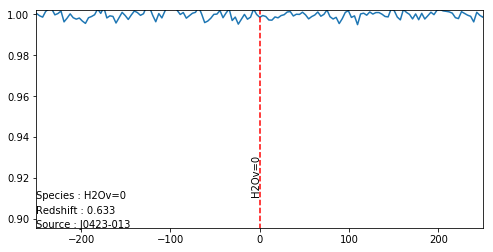

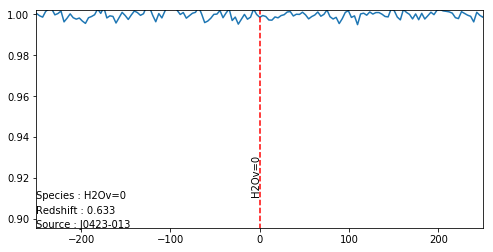

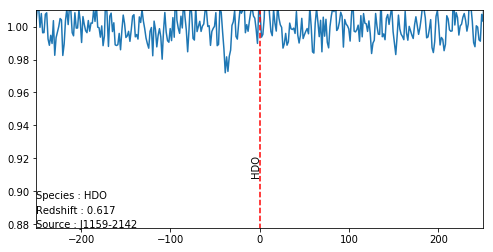

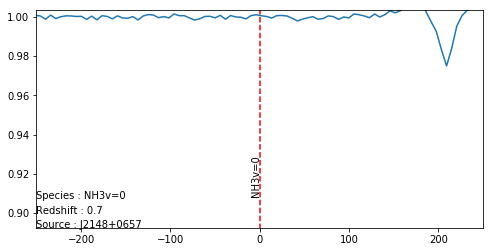

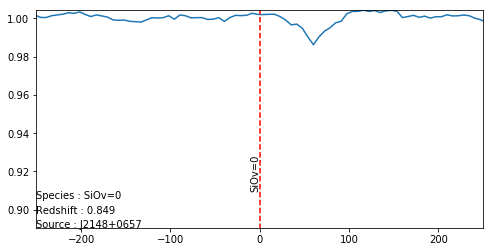

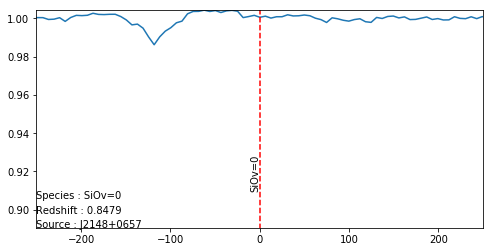

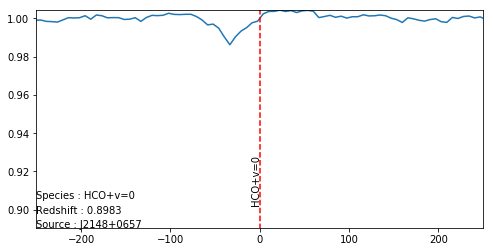

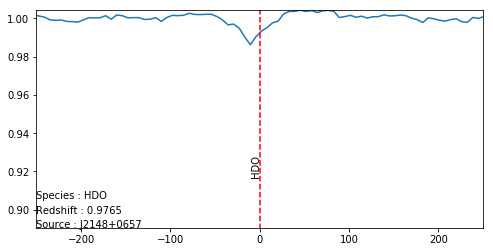

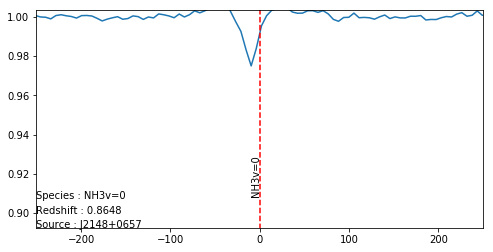

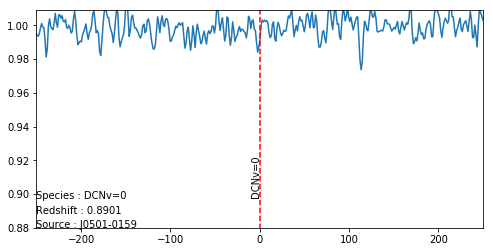

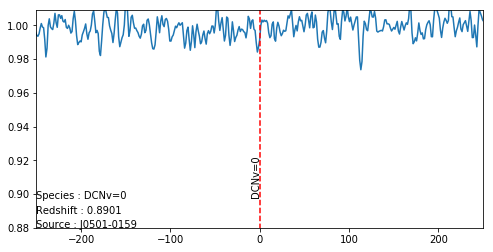

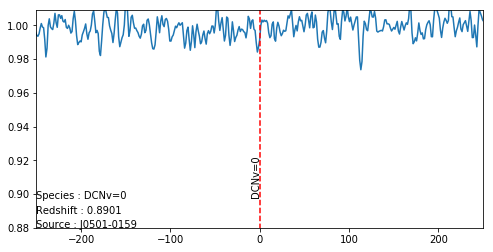

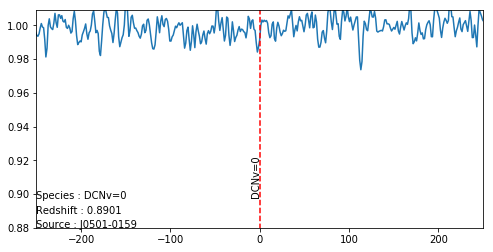

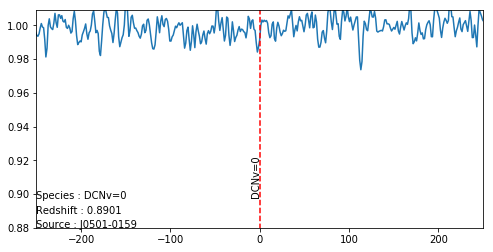

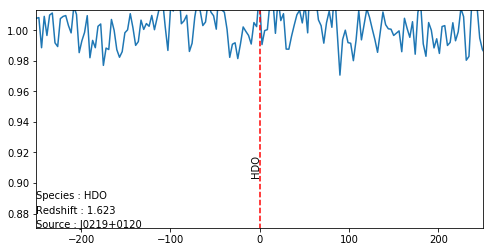

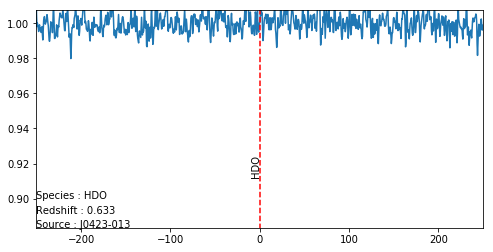

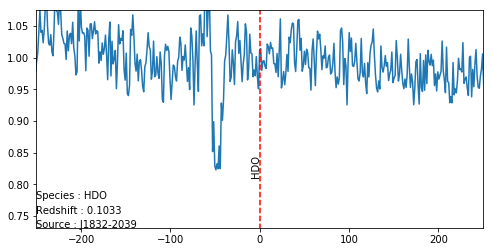

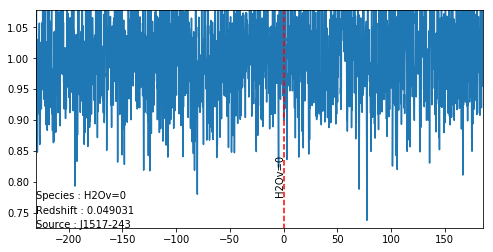

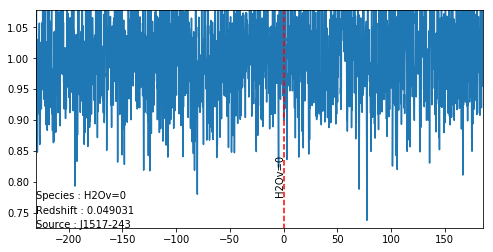

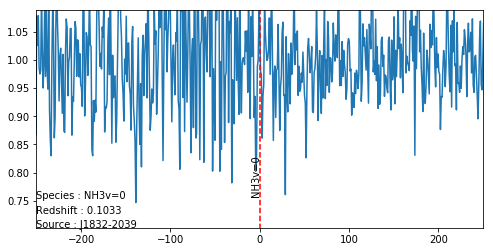

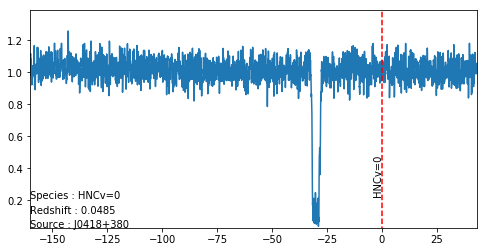

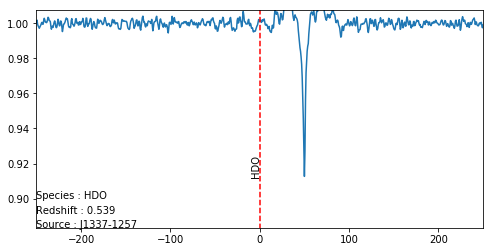

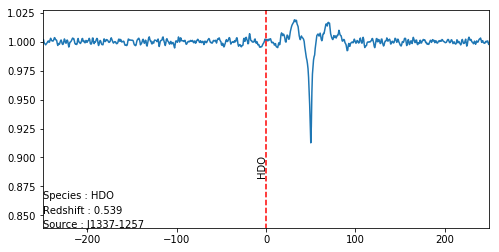

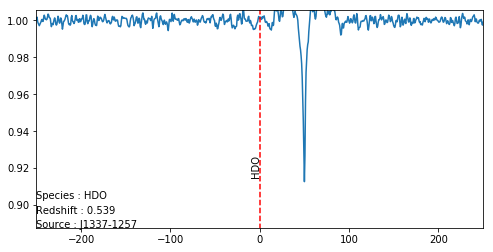

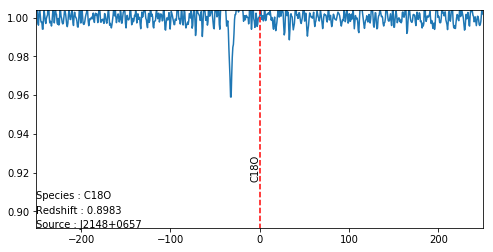

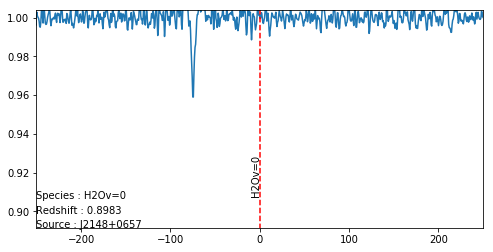

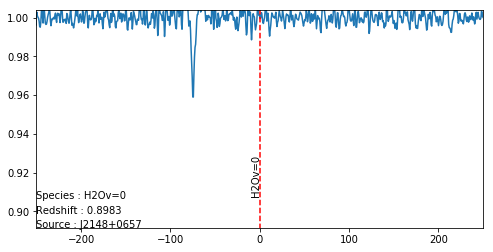

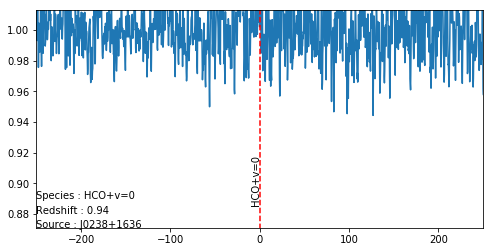

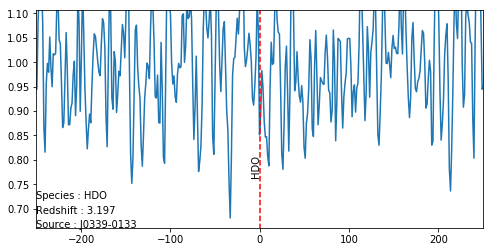

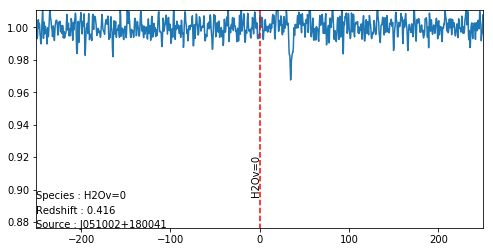

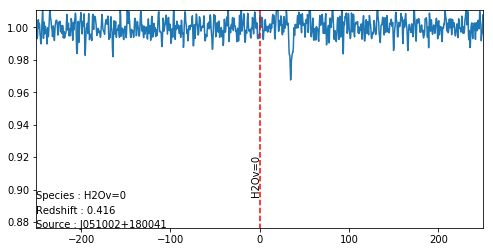

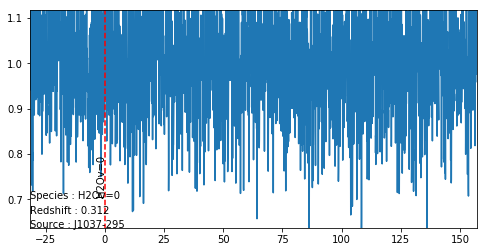

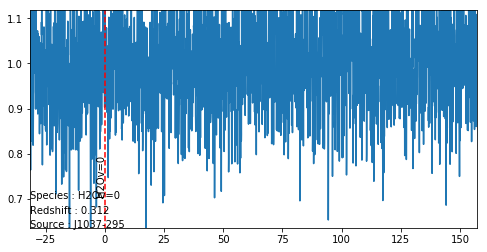

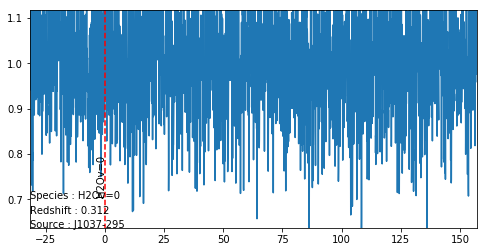

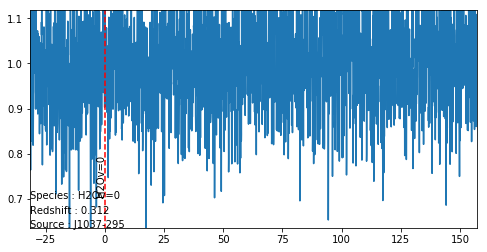

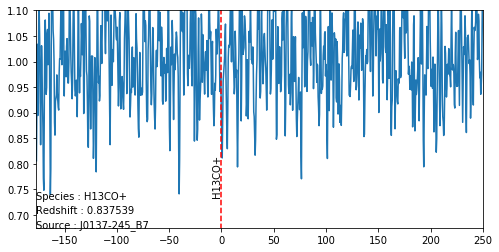

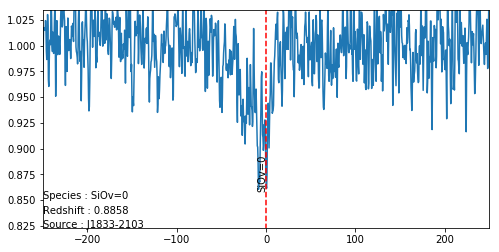

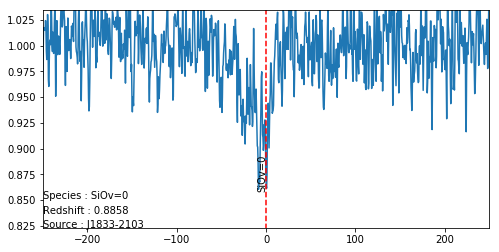

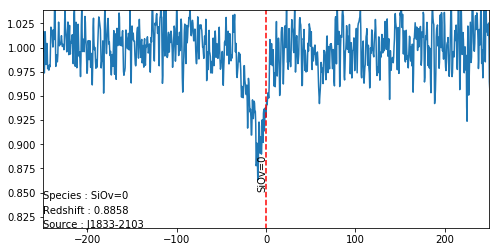

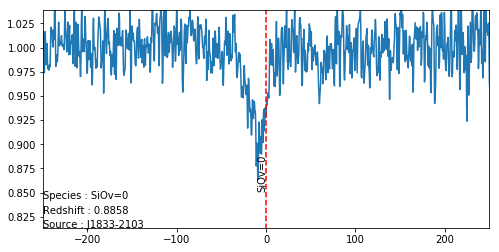

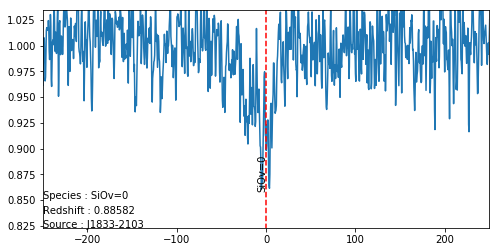

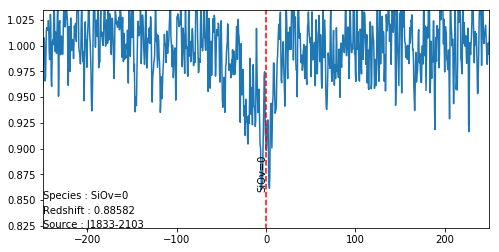

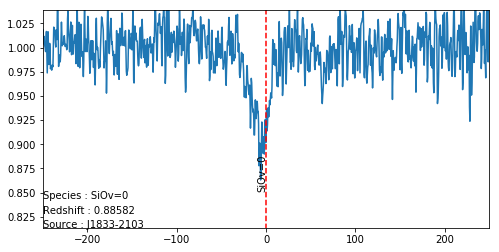

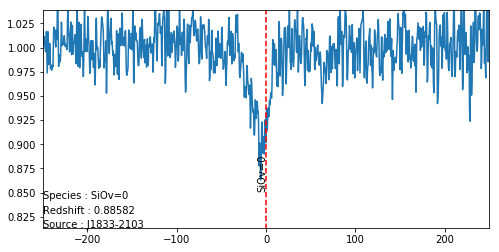

In [138]:
pl = lt.plotLines("fake", "fake", "fake")

for det in linesFound:
    datafile = datadir + det['filedata'][2:]
    freq , amp = pl.extractData(datafile)
    amp = amp / np.mean(amp)
    freq = freq * (1. + det['redshift'])
    dv = c.value * 1e-3 *  (freq - det['frequency']) / det['frequency']
    plotSpectra(det,dv,amp)
